<a href="https://colab.research.google.com/github/Atharva-D/Detection-and-Prediction-of-Diabetes/blob/main/Final_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%%R 
install.packages('caret')
install.packages('mlbench')
install.packages('devtools') # if not already installed
library(devtools)
#install_github("dcomtois/summarytools")
#install.packages('summarytools')
install.packages("corrplot")
install.packages("gridExtra")
install.packages("timeDate")
install.packages("pROC")
install.packages("caTools")
install.packages("rpart.plot")
install.packages("graphics")







R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caret_6.0-90.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2335088 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [12]:
%%R
library(caret) #ML Model buidling package
library(tidyverse) #ggplot and dplyr
library(MASS) #Modern Applied Statistics with S
library(mlbench) #data sets from the UCI repository.
#library(summarytools)
library(corrplot) #Correlation plot
library(gridExtra) #Multiple plot in single grip space
library(timeDate) 
library(pROC) #ROC
library(caTools) #AUC
library(rpart.plot) #CART Decision Tree
library(e1071) #imports graphics, grDevices, class, stats, methods, utils
library(graphics) #fourfoldplot

In [14]:

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
%%R
data =  read.csv("/content/gdrive/MyDrive/diabetes.csv")
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



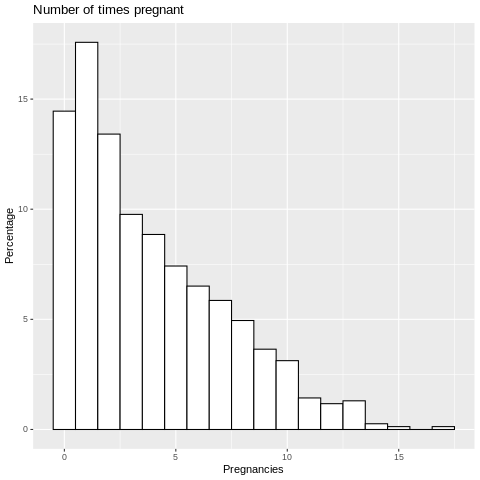

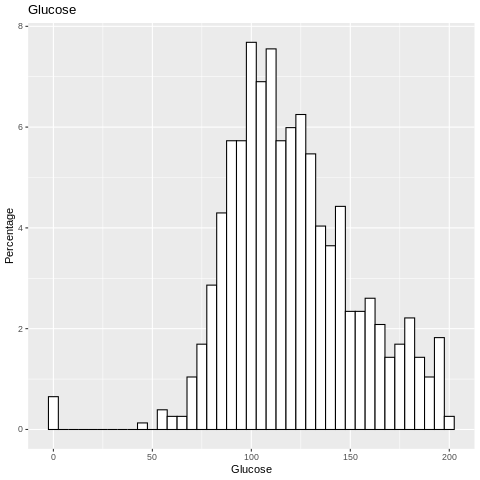

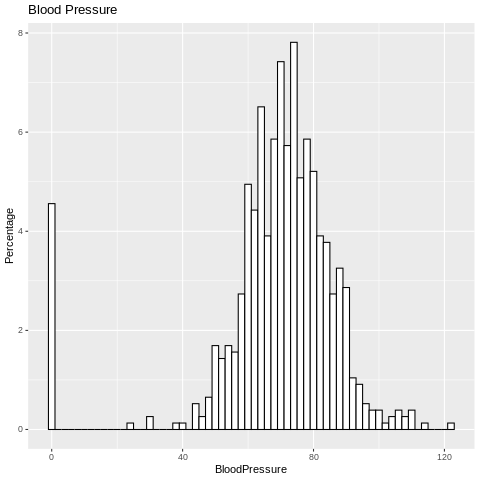

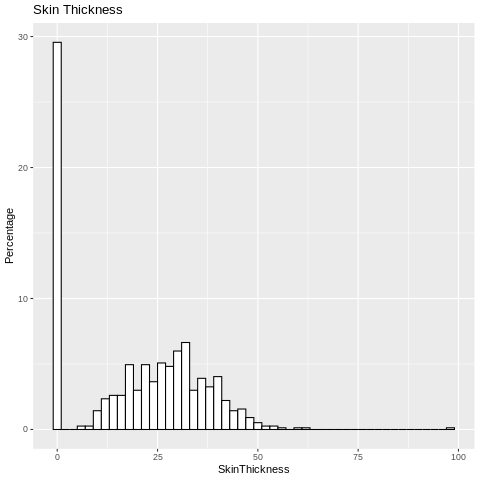

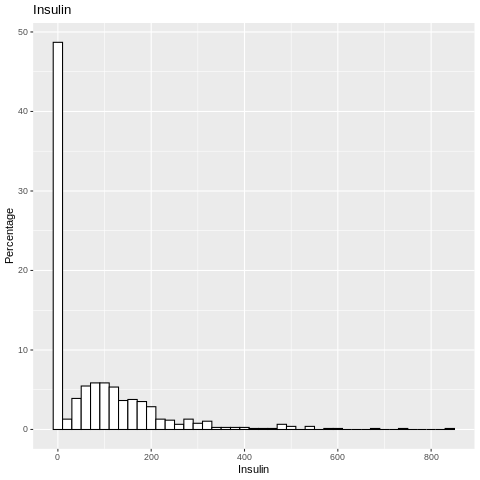

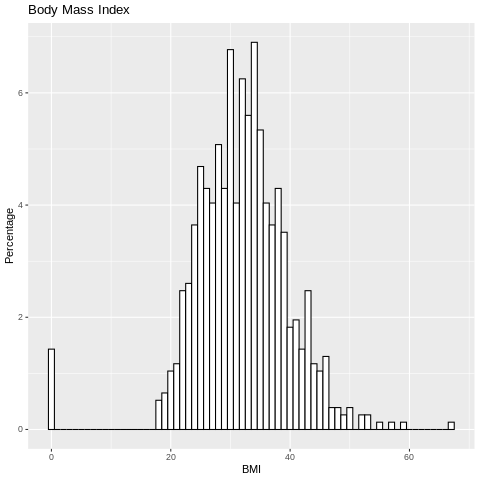

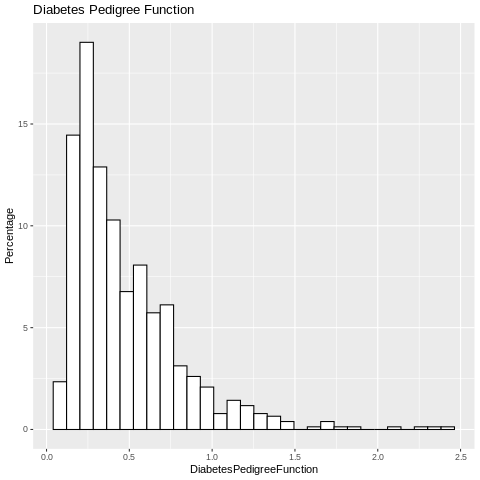

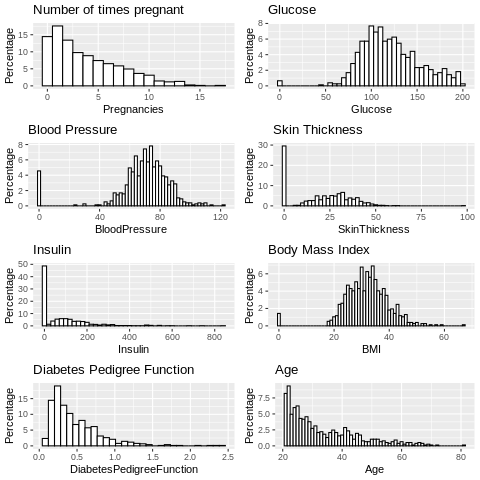

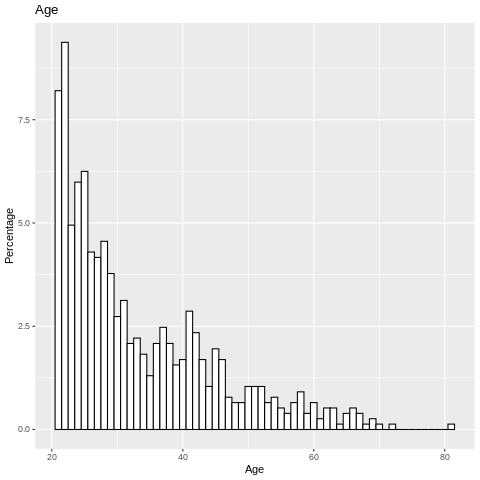

In [19]:
%%R
#Percentages plot of different variables----
data$Outcome <- factor(data$Outcome)
p1 <- ggplot(data, aes(x=Pregnancies)) + ggtitle("Number of times pregnant") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 1, colour="black", fill="white") + ylab("Percentage")
print(p1)
p2 <- ggplot(data, aes(x=Glucose)) + ggtitle("Glucose") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 5, colour="black", fill="white") + ylab("Percentage")
print(p2)
p3 <- ggplot(data, aes(x=BloodPressure)) + ggtitle("Blood Pressure") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 2, colour="black", fill="white") + ylab("Percentage")
print(p3)
p4 <- ggplot(data, aes(x=SkinThickness)) + ggtitle("Skin Thickness") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 2, colour="black", fill="white") + ylab("Percentage")
print(p4)
p5 <- ggplot(data, aes(x=Insulin)) + ggtitle("Insulin") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 20, colour="black", fill="white") + ylab("Percentage")
print(p5)
p6 <- ggplot(data, aes(x=BMI)) + ggtitle("Body Mass Index") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth = 1, colour="black", fill="white") + ylab("Percentage")
print(p6)
p7 <- ggplot(data, aes(x=DiabetesPedigreeFunction)) + ggtitle("Diabetes Pedigree Function") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), colour="black", fill="white") + ylab("Percentage")
print(p7)
p8 <- ggplot(data, aes(x=Age)) + ggtitle("Age") +
  geom_histogram(aes(y = 100*(..count..)/sum(..count..)), binwidth=1, colour="black", fill="white") + ylab("Percentage")
grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol=2)
print(p8)















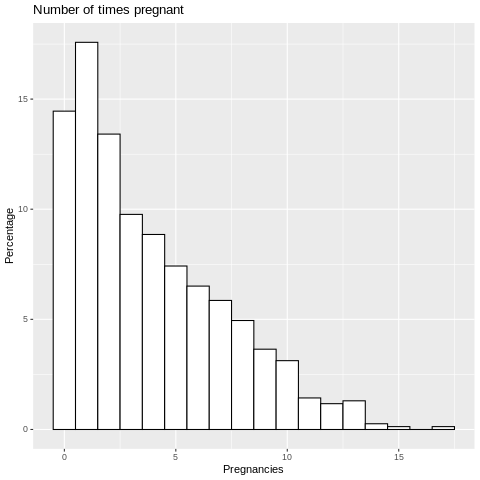

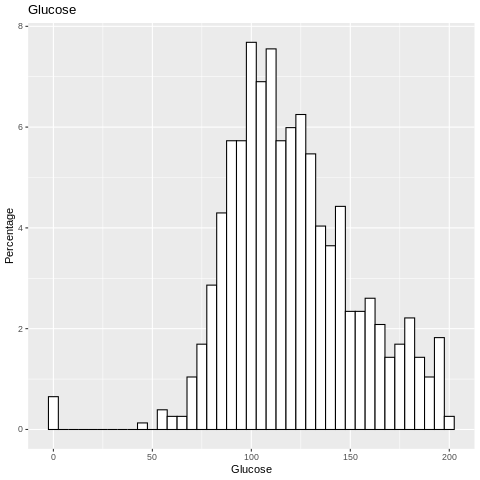

In [20]:
%%R
#Boxplot for the distribution of BMI(variable) affecting Outcome----
b1 = ggplot(data,aes(x=Outcome,y=BMI,fill=Outcome))+geom_boxplot()
print(p1)

#Boxplot for the distribution of Glucose(variable) affecting Outcome----
b2=ggplot(data,aes(x=Outcome,y=Glucose,fill=Outcome))+geom_boxplot()
print(p2)

R[write to console]: `geom_smooth()` using formula 'y ~ x'



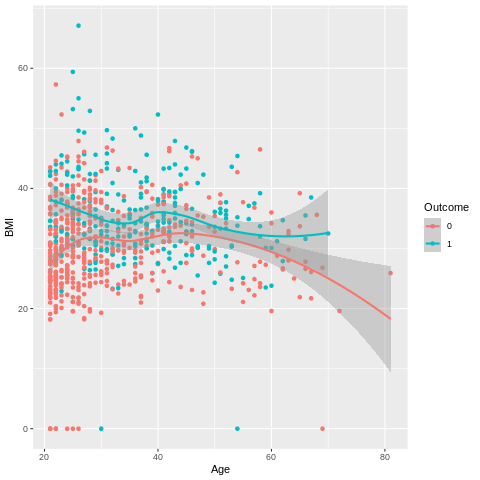

In [21]:
%%R
#Scatterplot for the relationship of Age and BMI affecting Outcome Variable----
b3=ggplot(data,aes(x=Age,y=BMI,col=Outcome))+geom_point()
#print(p3)
b3+geom_smooth(method = "loess")

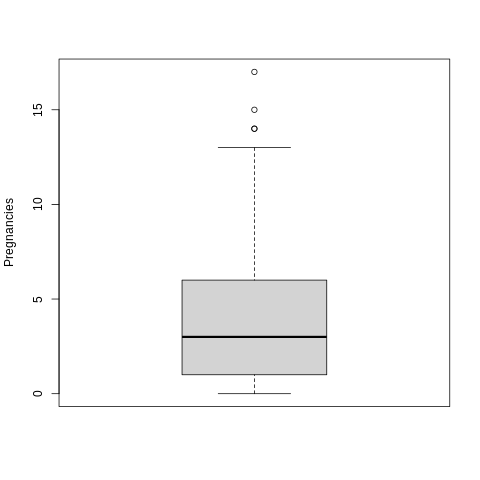

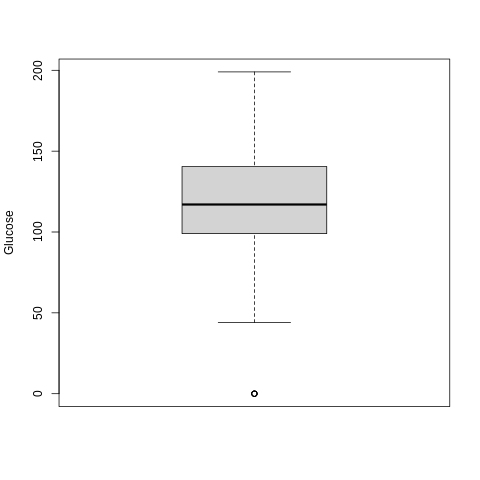

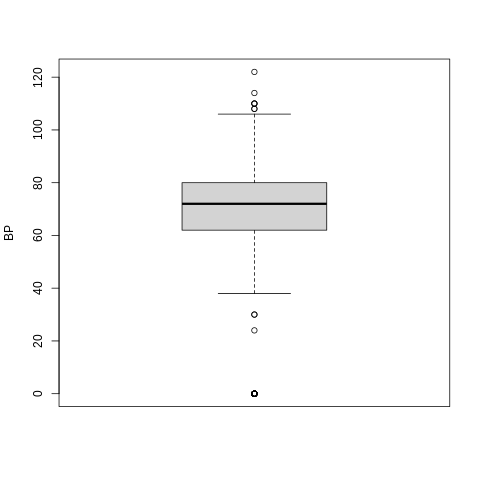

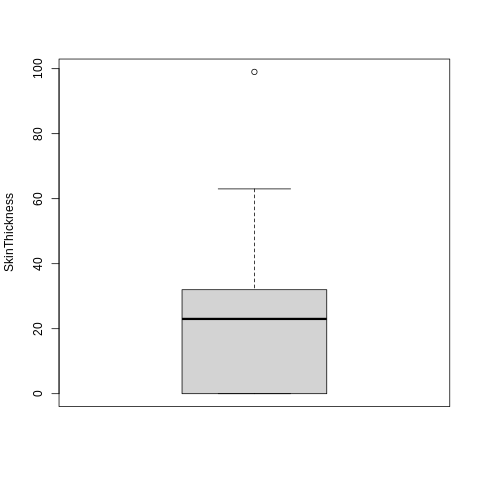

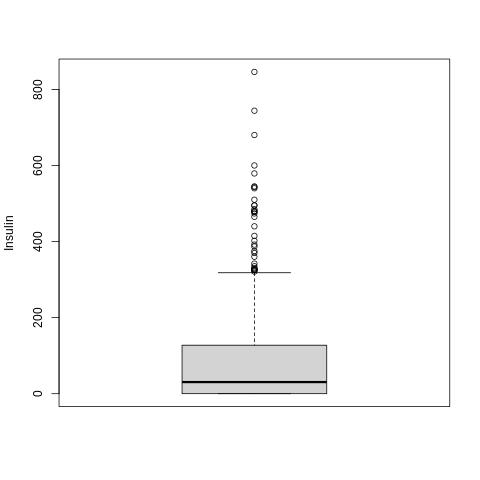

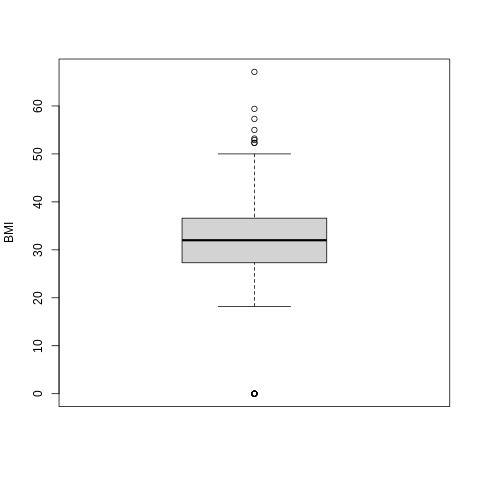

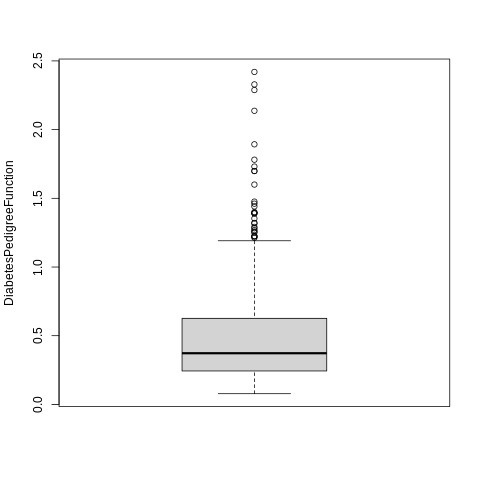

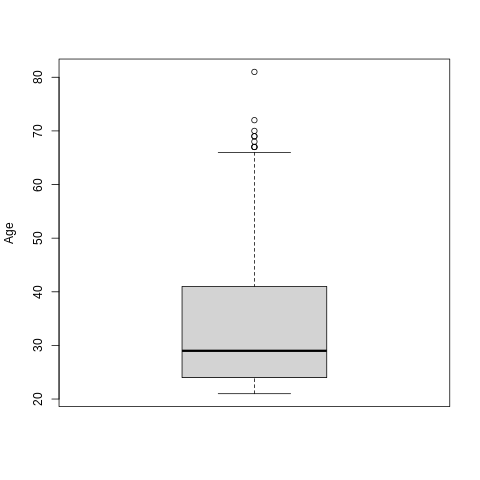

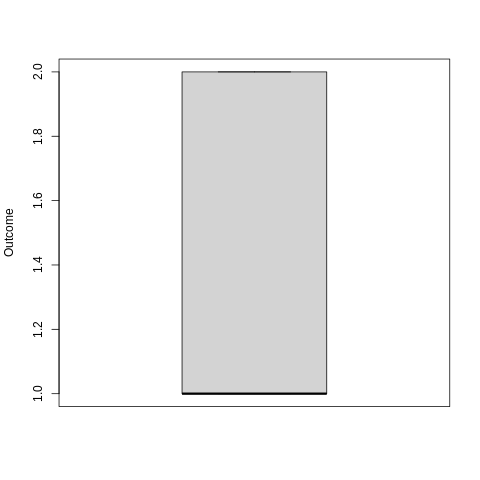

In [25]:
%%R
#Boxplot for each Variable to check if any outliers are present----
#---Check if any Outliers are present
boxplot(data$Pregnancies,ylab="Pregnancies")
boxplot(data$Glucose,ylab="Glucose")
boxplot(data$BloodPressure,ylab="BP")
boxplot(data$SkinThickness,ylab="SkinThickness")
boxplot(data$Insulin,ylab="Insulin")
boxplot(data$BMI,ylab="BMI")
boxplot(data$DiabetesPedigreeFunction,ylab="DiabetesPedigreeFunction")
boxplot(data$Age,ylab="Age")
boxplot(data$Outcome,ylab="Outcome")

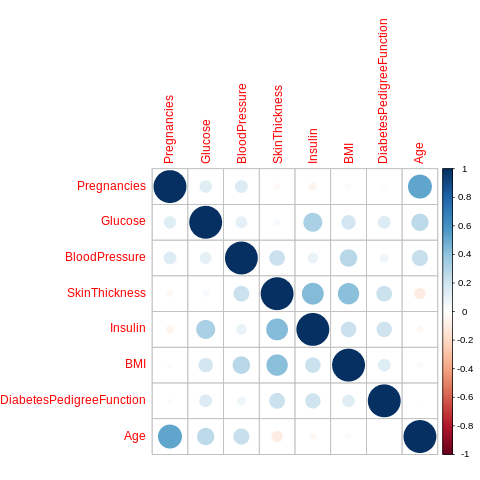

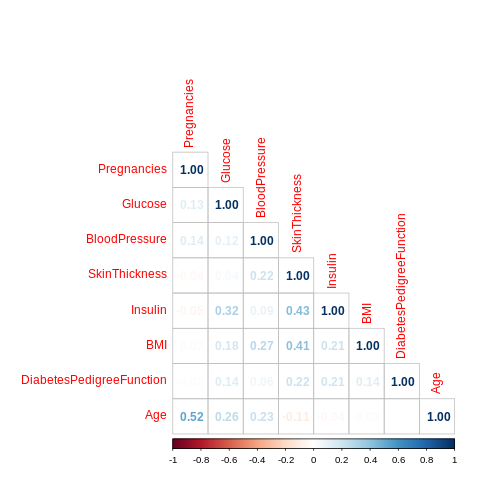

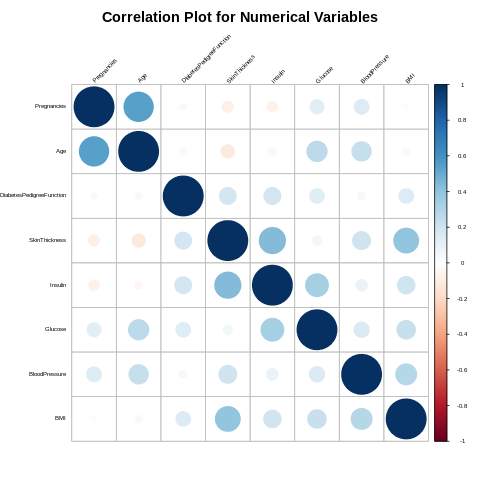

In [23]:
%%R
#Check how many values are there for negative and positive Outcome----
l1<-ggplot(data, aes(data$Outcome, fill = Outcome)) + 
  geom_bar() +
  theme_bw() +
  labs(title = "Diabetes Classification", x = "Outcome") +
  theme(plot.title = element_text(hjust = 0.5))


#Partitioning the data----
partition <- caret::createDataPartition(y = data$Outcome, times = 1, p = 0.7, list = FALSE)

# create training data set
train_set <- data[partition,]

# create testing data set, subtracting the rows partition to get remaining 30% of the data
test_set <- data[-partition,]
cor_data <- cor(train_set[,setdiff(names(train_set), 'Outcome')])
#Numerical Correlation Matrix
cor_data
#Correlational plot for different variables w.r.t Outcome variable
corrplot::corrplot(cor_data)
corrplot::corrplot(cor_data, type = "lower", method = "number")
#Correlational plot for numeric variables
numeric.var <- sapply(data, is.numeric)
corr.matrix <- cor(data[,numeric.var])
l2<-corrplot(corr.matrix, main="\n\nCorrelation Plot for Numerical Variables", order = "hclust", tl.col = "black", tl.srt=45, tl.cex=0.5, cl.cex=0.5)

R[write to console]: The following objects are masked from data (pos = 3):

    Age, BloodPressure, BMI, DiabetesPedigreeFunction, Glucose,
    Insulin, Outcome, Pregnancies, SkinThickness


R[write to console]: The following objects are masked from data (pos = 4):

    Age, BloodPressure, BMI, DiabetesPedigreeFunction, Glucose,
    Insulin, Outcome, Pregnancies, SkinThickness


R[write to console]: The following objects are masked from data (pos = 5):

    Age, BloodPressure, BMI, DiabetesPedigreeFunction, Glucose,
    Insulin, Outcome, Pregnancies, SkinThickness




$stats
     [,1] [,2]
[1,]    0  0.0
[2,]    1  1.5
[3,]    2  4.0
[4,]    5  8.0
[5,]   11 17.0

$n
[1] 500 268

$conf
         [,1]    [,2]
[1,] 1.717361 3.37266
[2,] 2.282639 4.62734

$out
 [1] 13 13 13 12 12 12 13 12 13 12

$group
 [1] 1 1 1 1 1 1 1 1 1 1

$names
[1] "0" "1"



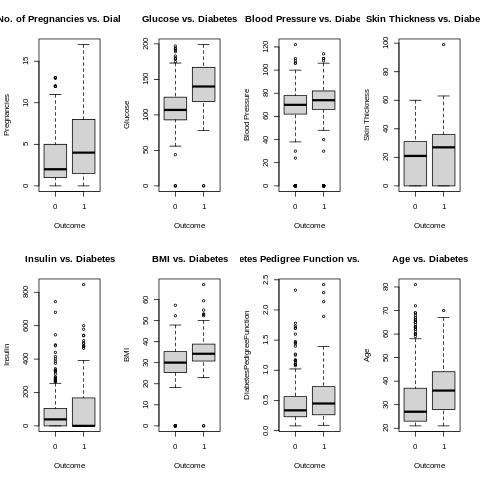

In [26]:
%%R
#Boxplot for showing the exact distribution of 0(negative) and 1(positive) over all variables----
attach(data)
par(mfrow=c(2,4))
a=boxplot(Pregnancies~Outcome, main="No. of Pregnancies vs. Diabetes", 
          xlab="Outcome", ylab="Pregnancies")
print(a)
boxplot(Glucose~Outcome, main="Glucose vs. Diabetes", 
        xlab="Outcome", ylab="Glucose")
boxplot(BloodPressure~Outcome, main="Blood Pressure vs. Diabetes", 
        xlab="Outcome", ylab="Blood Pressure")
boxplot(SkinThickness~Outcome, main="Skin Thickness vs. Diabetes", 
        xlab="Outcome", ylab="Skin Thickness")
boxplot(Insulin~Outcome, main="Insulin vs. Diabetes", 
        xlab="Outcome", ylab="Insulin")
boxplot(BMI~Outcome, main="BMI vs. Diabetes", 
        xlab="Outcome", ylab="BMI")
boxplot(DiabetesPedigreeFunction~Outcome, main="Diabetes Pedigree Function vs. Diabetes", xlab="Outcome", ylab="DiabetesPedigreeFunction")
boxplot(Age~Outcome, main="Age vs. Diabetes", 
        xlab="Outcome", ylab="Age")